# This assignment was completed by 

Bevan Fairleigh 219296864 
Rao Siddhant Yadav 220384895
Chris Chong

### for Deakin University SIT789 T2 2021
### Applications of Computer Vision and Speech Processing
### 4.3P Image Recognition System

In [13]:
# PLEASE START BY LOOKING AT THE 4TH CELL

## Set up

import numpy as np
import cv2 as cv
import os


## any imports go here


In [23]:
## Get dataset

## Assuming we can store up to 100MB on github, let's aim to keep dataset under 100MB
## test data set loaded now, stolen from simpsons data set, 
## Most of this code was for loading in and presplitting the dataset.  ignore it now, unless we need it for a different set.


# path = 'Dataset'
# subpaths = ["/test/","/train/","/validate/"]

# #Check files in dir

# classes = os.listdir(path+subpaths[1])
# # print(classes)

# import random 

# filenames = [os.path.join(path+"/classes/"+classes[3], f) for f in os.listdir(path+"/classes/"+classes[3])]

# random.shuffle(filenames)

# total = len(filenames)
# testsplit = .30 * total
# trainsplit = (.4 * total) + testsplit
# valsplit = (.3 * total) + trainsplit

# count = 0
# print (f"{testsplit} {trainsplit} {valsplit}")

# for fn in filenames:
#     if count < testsplit:
#         os.rename(fn, "Dataset/test/principal_skinner/"+str(count)+".jpg")
#     elif count < trainsplit:
#         os.rename(fn, "Dataset/train/principal_skinner/"+str(count)+".jpg")
#     else:
#         os.rename(fn, "Dataset/validate/principal_skinner/"+str(count)+".jpg")
    
    
#     count += 1





228.0 532.0 760.0


In [3]:
# path = 'C:/Users/admin/Desktop/Masters AI/Applications of CV and SP/Week 4/Updated/Submissions/computervisionproject-main/dataset'
# subpaths = ["/test/","/train/","/validate/"]
# classes =  os.listdir(path+subpaths[1])

# print(f"Our classes are {classes}")

# training_file_names = []
# test_file_names = []
# val_file_names = []

# training_labels = []
# test_labels = []
# val_labels = []

# for i in range(0,len(classes)):
#     sub_path = path + "/train/" + classes[i] + '/'
#     sub_file_names = [os.path.join(sub_path, f) for f in os.listdir(sub_path)]
#     sub_labels = [i] * len(sub_file_names)
#     training_file_names += sub_file_names
#     training_labels += sub_labels
    
#     sub_path = path + "/test/" + classes[i] + '/'
#     sub_file_names = [os.path.join(sub_path, f) for f in os.listdir(sub_path)]
#     sub_labels = [i] * len(sub_file_names)
#     test_file_names += sub_file_names
#     test_labels += sub_labels
    
#     sub_path = path + "/validate/" + classes[i] + '/'
#     sub_file_names = [os.path.join(sub_path, f) for f in os.listdir(sub_path)]
#     sub_labels = [i] * len(sub_file_names)
#     val_file_names += sub_file_names
#     val_labels += sub_labels
    
# print(training_labels)
# print(test_labels)
# print(val_labels)







In [12]:
# # Starting here from 4.1
# # 1. Bag-of-Words (BoW) model

# import numpy as np
# import cv2 as cv
# from sklearn.cluster import KMeans
# class Dictionary(object):
#     def __init__(self, name, img_filenames, num_words):
#         self.name = name #name of your dictionary
#         self.img_filenames = img_filenames #list of image filenames
#         self.num_words = num_words #the number of words
        
#         self.training_data = [] #this is the training data required by the K-Means algorithm
#         self.words = [] #list of words, which are the centroids of clusters
 
#     def learn(self):
#         sift = cv.xfeatures2d.SIFT_create()
        
#         num_keypoints = [] #this is used to store the number of keypoints in each image
 
#         #load training images and compute SIFT descriptors
#         for filename in self.img_filenames:
#             img = cv.imread(filename)
#             img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#             list_des = sift.detectAndCompute(img_gray, None)[1]
#             if list_des is None:
#                 num_keypoints.append(0)
#             else:
#                 num_keypoints.append(len(list_des))
#                 for des in list_des:
#                     self.training_data.append(des)
 
#         #cluster SIFT descriptors using K-means algorithm
#         kmeans = KMeans(self.num_words) #num_words is number of clusters
#         kmeans.fit(self.training_data)
#         self.words = kmeans.cluster_centers_
 
#         #create word histograms for training images
#         training_word_histograms = [] #list of word histograms of all training images
#         index = 0
#         for i in range(0, len(self.img_filenames)):
#             #for each file, create a histogram
#             histogram = np.zeros(self.num_words, np.float32)
#             #if some keypoints exist
#             if num_keypoints[i] > 0:
#                 for j in range(0, num_keypoints[i]):
#                     histogram[kmeans.labels_[j + index]] += 1
#                 index += num_keypoints[i]
#                 histogram /= num_keypoints[i]
#                 training_word_histograms.append(histogram)
 
#         return training_word_histograms
 
#     def create_word_histograms(self, img_filenames):
#         sift = cv.xfeatures2d.SIFT_create()
#         histograms = []
        
#         for filename in img_filenames:
#             img = cv.imread(filename)
#             img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#             descriptors = sift.detectAndCompute(img_gray, None)[1]
            
#             histogram = np.zeros(self.num_words, np.float32) #word histogram for the input image
            
#             if descriptors is not None:
#                 for des in descriptors:
#                     #find the best matching word
#                     min_distance = 1111111 #this can be any large number
#                     matching_word_ID = -1 #initial matching_word_ID=-1 means no matching
                    
#                     for i in range(0, self.num_words): #search for the best matching word
#                         distance = np.linalg.norm(des - self.words[i])
#                         if distance < min_distance:
#                             min_distance = distance
#                             matching_word_ID = i
 
#                     histogram[matching_word_ID] += 1
 
#                 histogram /= len(descriptors) #normalise histogram to frequencies
 
#             histograms.append(histogram)
    
#         return histograms


In [15]:
# Creating list of simpson character labels of all training images

import os
simpson_char = ['chief_wiggum', 'comic_book_guy', 'mayor_quimby','principal_skinner']
path = 'C:/Users/admin/Desktop/Masters AI/Applications of CV and SP/Week 4/Updated/Submissions/computervisionproject-main/dataset/'
training_file_names = []
training_simpson_char_labels = []
for i in range(0, len(simpson_char)):
    sub_path = path + 'Train/' + simpson_char[i] + '/'
    sub_file_names = [os.path.join(sub_path, f) for f in os.listdir(sub_path)]
    sub_simpson_char_labels = [i] * len(sub_file_names) #create a list of N elements, all are i
    training_file_names += sub_file_names
    training_simpson_char_labels += sub_simpson_char_labels

print(training_file_names)
print(training_simpson_char_labels)

['C:/Users/admin/Desktop/Masters AI/Applications of CV and SP/Week 4/Updated/Submissions/computervisionproject-main/dataset/Train/chief_wiggum/316.jpg', 'C:/Users/admin/Desktop/Masters AI/Applications of CV and SP/Week 4/Updated/Submissions/computervisionproject-main/dataset/Train/chief_wiggum/317.jpg', 'C:/Users/admin/Desktop/Masters AI/Applications of CV and SP/Week 4/Updated/Submissions/computervisionproject-main/dataset/Train/chief_wiggum/318.jpg', 'C:/Users/admin/Desktop/Masters AI/Applications of CV and SP/Week 4/Updated/Submissions/computervisionproject-main/dataset/Train/chief_wiggum/319.jpg', 'C:/Users/admin/Desktop/Masters AI/Applications of CV and SP/Week 4/Updated/Submissions/computervisionproject-main/dataset/Train/chief_wiggum/320.jpg', 'C:/Users/admin/Desktop/Masters AI/Applications of CV and SP/Week 4/Updated/Submissions/computervisionproject-main/dataset/Train/chief_wiggum/321.jpg', 'C:/Users/admin/Desktop/Masters AI/Applications of CV and SP/Week 4/Updated/Submissions

In [21]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

sift = cv.xfeatures2d.SIFT_create()
num_keypoints = [] #this is used to store the number of keypoints in each image
training_data = []
 
#load training images and compute SIFT descriptors
for filename in training_file_names:
    img = cv.imread(filename)
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    list_des = sift.detectAndCompute(img_gray, None)[1]
    if list_des is None:
        num_keypoints.append(0)
    else:
        num_keypoints.append(len(list_des))
        for des in list_des:
            training_data.append(des)



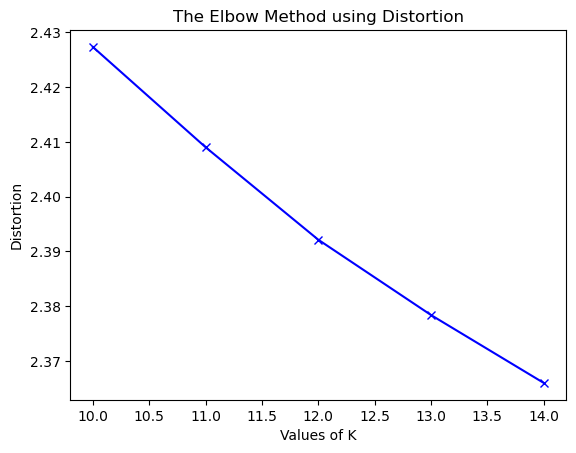

In [20]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(10, 15)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(training_data)
    kmeanModel.fit(training_data)
 
    distortions.append(sum(np.min(cdist(training_data, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / np.concatenate( training_data, axis=0 ).shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(training_data, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / np.concatenate( training_data, axis=0 ).shape[0]
    mapping2[k] = kmeanModel.inertia_

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
# NOTE: ONCE WE GET THE BEST K FROM HERE, WE CAN SIMPLY RUN 4.1 FOR THAT K VALUE BY REPLACING num_words